You want to create a set of features representing the colors appearing in an
image

Compute the histograms for each color channel

In [5]:
# Load libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image
image_bgr = cv2.imread("../sim_data/images/plane_256x256.jpg", cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
    [i], # Index of channel
    None, # No mask
    [256], # Histogram size
    [0,256]) # Range
    features.extend(histogram)
# Create a vector for an observation's feature values
observation = np.array(features).flatten()
# Show the observa


In [6]:
# Show the observation's value for the first five features
observation[0:5]

array([1027.,  217.,  182.,  146.,  146.], dtype=float32)

In the RGB color model, each color is the combination of three color channels
(i.e., red, green, blue). In turn, each channel can take on one of 256 values
(represented by an integer between 0 and 255). For example, the top-leftmost
pixel in our image has the following channel values

In [7]:
# Show RGB channel values
image_rgb[0,0]

array([107, 163, 212], dtype=uint8)

A histogram is a representation of the distribution of values in data. Here is a
simple example

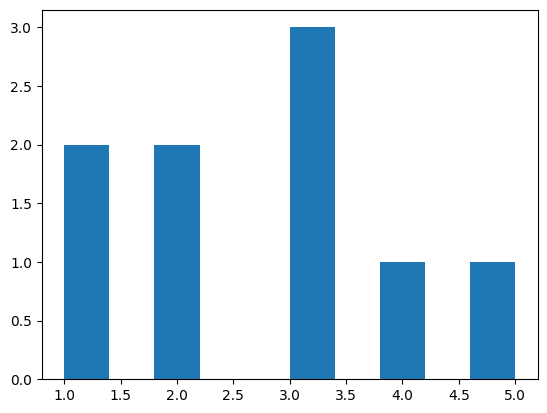

In [9]:
# Import pandas
import pandas as pd
# Create some data
data = pd.Series([1, 1, 2, 2, 3, 3, 3, 4, 5])
# Show the histogram
data.hist(grid=False)
plt.show()

In this example, we have some data with two 1s, two 2s, three 3s, one 4, and one
5. In the histogram, each bar represents the number of times each value (1, 2,
etc.) appears in our data.
We can apply this same technique to each of the color channels, but instead of
five possible values, we have 256 (the range of possible values for a channel
value). The x-axis represents the 256 possible channel values, and the y-axis
represents the number of times a particular channel value appears across all
pixels in an image

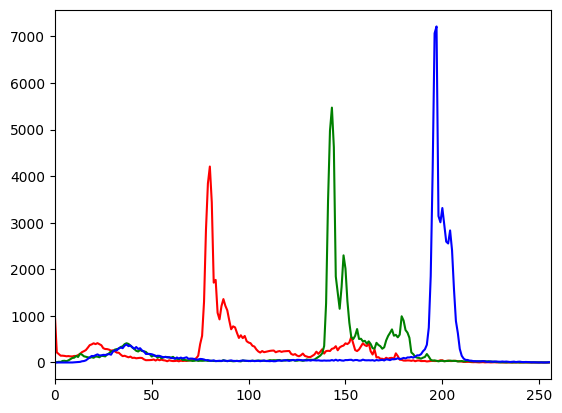

In [11]:
# Calculate the histogram for each color channel
colors = ("r","g","b")
# For each channel: calculate histogram, make plot
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
    [i], # Index of channel
    None, # No mask
    [256], # Histogram size
    [0,256]) # Range
    plt.plot(histogram, color = channel)
    plt.xlim([0,256])
# Show plot
plt.show()

As we can see in the histogram, barely any pixels contain the blue channel
values between 0 and ~180, while many pixels contain blue channel values
between ~190 and ~210. This distribution of channel values is shown for all
three channels. The histogram, however, is not simply a visualization; it is 256
features for each color channel, making for 768 total features representing the
distribution of colors in an image